# The lines before the header were manually removed

New Code with pickle

In [1]:
import pandas as pd
import pickle

# Load the data
try:
    with open("data/countycarlowtenyears.pkl", "rb") as f:
        countycarlowtenyears = pickle.load(f)
except FileNotFoundError:
    countycarlowtenyears = pd.read_csv("data/dly375_carlow-oakpark.csv")
    countycarlowtenyears["date"] = pd.to_datetime(countycarlowtenyears["date"])
    countycarlowtenyears = countycarlowtenyears[(countycarlowtenyears["date"].dt.year >= 2013) & (countycarlowtenyears["date"].dt.year <= 2022)]


In [2]:
print(countycarlowtenyears.dtypes)

date         datetime64[ns]
ind                   int64
maxtp                object
ind.1                 int64
mintp                object
igmin                object
gmin                 object
ind.2                 int64
rain                 object
cbl                  object
wdsp                 object
ind.3                 int64
hm                    int64
ind.4                 int64
ddhm                  int64
ind.5                 int64
hg                    int64
soil                 object
pe                   object
evap                 object
smd_wd               object
smd_md               object
smd_pd               object
glorad               object
file_name            object
dtype: object


In [3]:
countycarlowtenyears = countycarlowtenyears.loc[:, ~countycarlowtenyears.columns.str.startswith(('ig','ind', 'file'))]

In [4]:
# Assuming df is the name of your dataframe
countycarlowtenyears= countycarlowtenyears.replace(r'\s+', 777444, regex=True)


In [5]:
for column in countycarlowtenyears.columns:
    # get the indices of the rows that contain 777444
    indices = countycarlowtenyears[countycarlowtenyears[column] == 777444].index.tolist()
    
    # get the date column values for those indices
    dates = countycarlowtenyears.loc[indices, 'date'].tolist()
    
    # print the results
    print(f'The value of 777444 occurred {len(indices)} times in {column} on the following dates: {dates}.')

The value of 777444 occurred 0 times in date on the following dates: [].
The value of 777444 occurred 0 times in maxtp on the following dates: [].
The value of 777444 occurred 0 times in mintp on the following dates: [].
The value of 777444 occurred 1 times in gmin on the following dates: [Timestamp('2014-05-14 00:00:00')].
The value of 777444 occurred 0 times in rain on the following dates: [].
The value of 777444 occurred 2 times in cbl on the following dates: [Timestamp('2013-07-10 00:00:00'), Timestamp('2013-07-11 00:00:00')].
The value of 777444 occurred 0 times in wdsp on the following dates: [].
The value of 777444 occurred 0 times in hm on the following dates: [].
The value of 777444 occurred 0 times in ddhm on the following dates: [].
The value of 777444 occurred 0 times in hg on the following dates: [].
The value of 777444 occurred 0 times in soil on the following dates: [].
The value of 777444 occurred 0 times in pe on the following dates: [].
The value of 777444 occurred 0 

In [6]:
countycarlowtenyears.loc[countycarlowtenyears['date'].isin(['2013-07-10', '2013-07-11']), 'cbl'] = 0

In [8]:
countycarlowtenyears.loc[countycarlowtenyears['date'] == '2014-05-14', 'gmin'] = 0

In [9]:
countycarlowtenyears[["glorad","hm","ddhm"]] = countycarlowtenyears[["glorad","hm","ddhm"]].astype("int64")

In [10]:
# Convert multiple columns to float data type
columns_to_convert = ["maxtp","mintp","rain","cbl", "wdsp", "soil", "pe", "evap", "smd_wd", "smd_md", "smd_pd"]
countycarlowtenyears[columns_to_convert] = countycarlowtenyears[columns_to_convert].astype(float)


In [16]:
countycarlowtenyears[["gmin"]] = countycarlowtenyears[["gmin"]].astype(float)

In [17]:
print(countycarlowtenyears.dtypes)

date              datetime64[ns]
maxtp                    float64
mintp                    float64
gmin                     float64
rain                     float64
cbl                      float64
wdsp                     float64
hm                         int64
ddhm                       int64
hg                         int64
soil                     float64
pe                       float64
evap                     float64
smd_wd                   float64
smd_md                   float64
smd_pd                   float64
glorad                     int64
rainfall_class              bool
dtype: object


In [12]:
countycarlowtenyears['rainfall_class'] = countycarlowtenyears['rain'] != 0

In [18]:
with open("data/countycarlowtenyears.pkl", "wb") as f:
        pickle.dump(countycarlowtenyears, f)

Starting point from loading Pkl file

In [19]:
import pandas as pd
import pickle

with open("data/countycarlowtenyears.pkl", "rb") as f:
    countycarlowtenyears = pickle.load(f)


In [52]:
countycarlowtenyears.drop(columns=['igmin'], inplace=True)

In [15]:
countycarlowtenyears.dtypes

date              datetime64[ns]
maxtp                    float64
mintp                    float64
gmin                      object
rain                     float64
cbl                      float64
wdsp                     float64
hm                         int64
ddhm                       int64
hg                         int64
soil                     float64
pe                       float64
evap                     float64
smd_wd                   float64
smd_md                   float64
smd_pd                   float64
glorad                     int64
rainfall_class              bool
dtype: object

In [20]:
countycarlowtenyears.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
maxtp,3649.0,14.182845,5.360048,-0.7,10.200,13.90,18.100,31.70
mintp,3649.0,6.338641,4.550677,-6.4,2.700,6.40,9.900,17.60
gmin,3649.0,3.700767,5.568827,-12.9,-0.400,3.70,7.800,17.40
rain,3649.0,2.332064,4.461597,0.0,0.000,0.30,2.600,44.00
cbl,3649.0,1005.763798,26.303563,0.0,998.800,1007.30,1014.300,1038.90
wdsp,3649.0,7.454152,3.573366,0.2,4.800,6.80,9.400,22.50
hm,3649.0,14.444231,5.773856,3.0,10.000,13.00,18.000,48.00
ddhm,3649.0,205.412442,83.120349,0.0,160.000,200.00,270.000,360.00
hg,3649.0,21.793642,8.624946,4.0,16.000,20.00,26.000,68.00
soil,3649.0,11.432431,5.565604,0.2,6.708,11.09,16.035,26.32


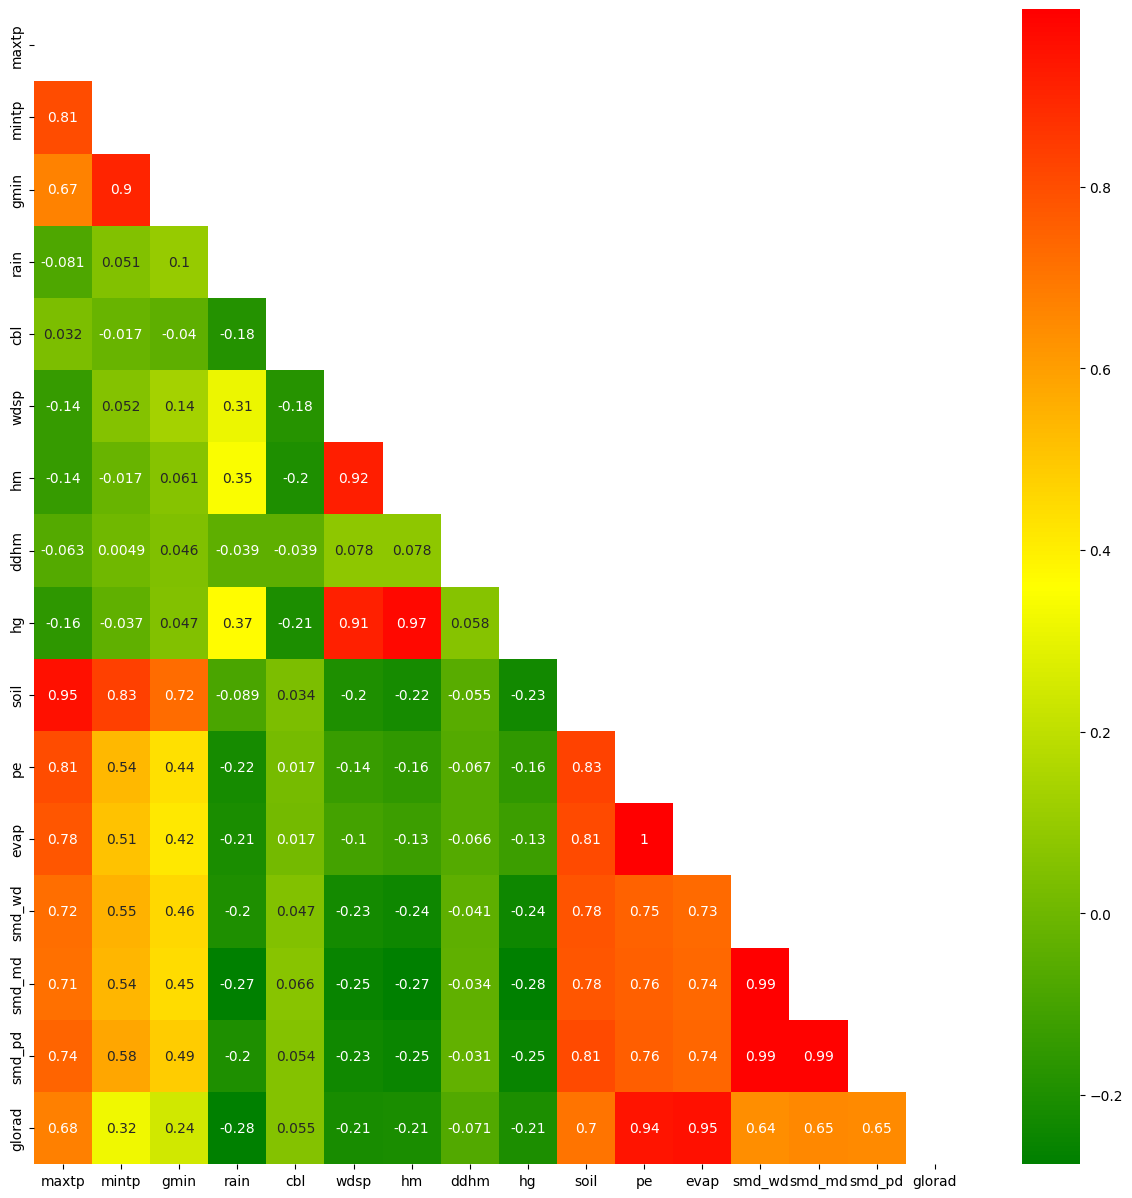

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the colormap
colors = ['green', 'yellow', 'red']

# Create the colormap
cmap = LinearSegmentedColormap.from_list('green_yellow_red', colors)

# Plot correlation matrix for numerical variables in shanon dataset except date,ind.5,ind.4,ind.3,ind.2,ind.1
num_cols = countycarlowtenyears.select_dtypes(include="number").filter(regex='^(?!ind)').columns  
corr = countycarlowtenyears[num_cols].corr(method="pearson")
plt.figure(figsize=(15, 15))
# Create a lower triangular heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,cmap=cmap)
plt.savefig("carlow_heatmap10years_pearson.png")

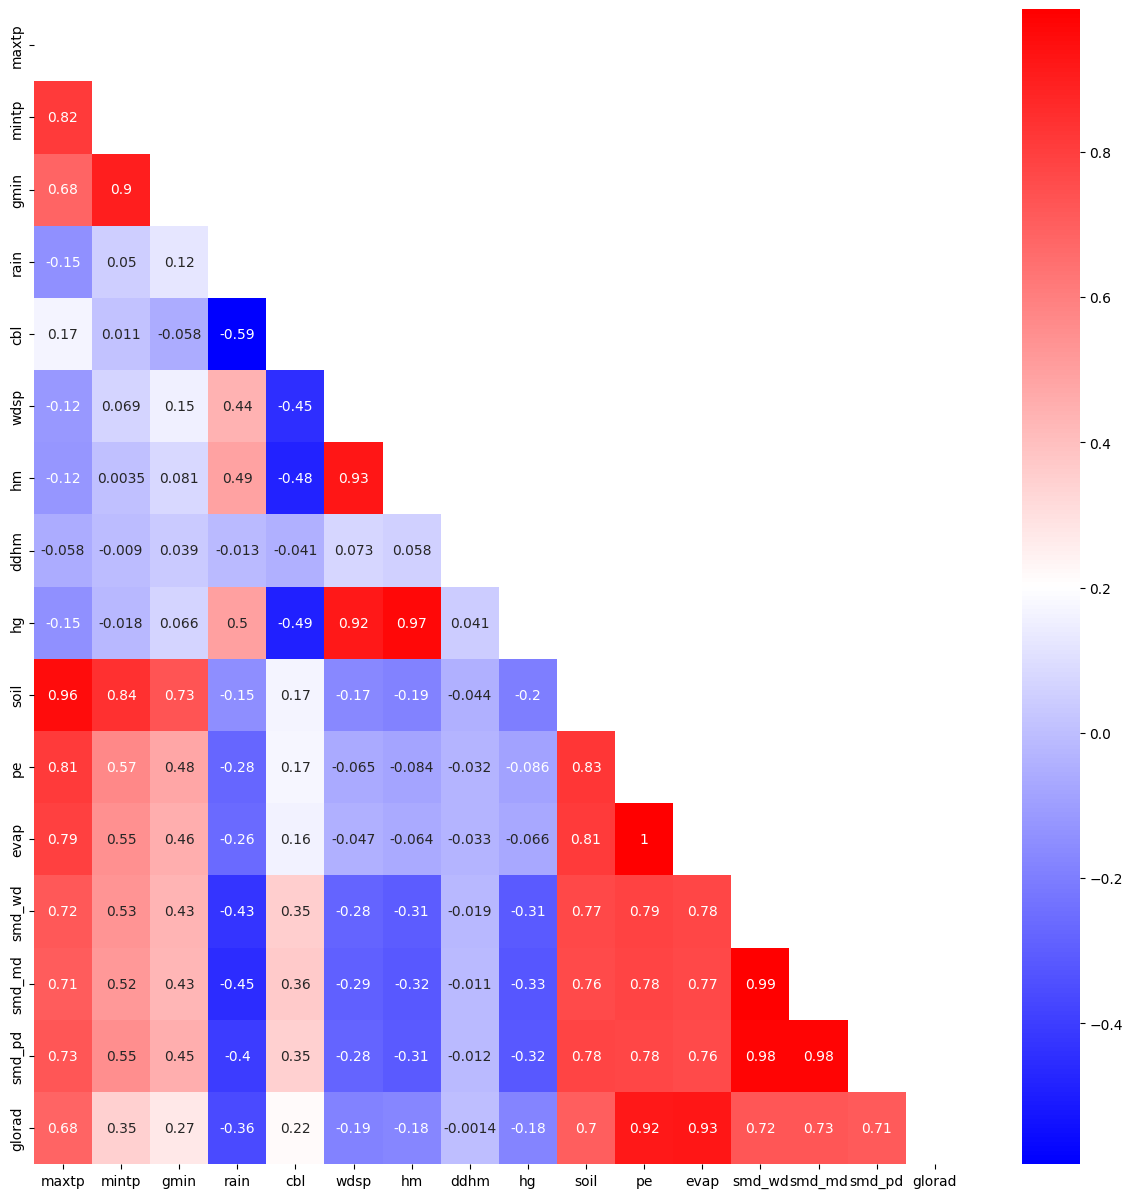

In [23]:
num_cols = countycarlowtenyears.select_dtypes(include="number").filter(regex='^(?!ind)').columns     
corr = countycarlowtenyears[num_cols].corr(method="spearman")
plt.figure(figsize=(15, 15))
# Create a lower triangular heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,cmap="bwr")
plt.savefig("carlow_heatmap10years_spearman.png")

All Parameters Included

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = countycarlowtenyears.drop(['rainfall_class','date'], axis=1)
y = countycarlowtenyears['rainfall_class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=74)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression(max_iter=1000)),
    ("Random forest", RandomForestClassifier()),
    ("K-nearest neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)


C:\Users\meatefza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.969,0.959,0.918,1.000,0.959
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,K-nearest neighbors,0.721,0.681,0.836,0.525,0.681
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Removing hm

In [12]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler,StandardScaler,QuantileTransformer,PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = countycarlowtenyears.drop(['rainfall_class','date','hm'], axis=1)
y = countycarlowtenyears['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("K-nearest neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)


,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.991,0.987,0.975,1.000,0.987
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,K-nearest neighbors,0.891,0.870,0.866,0.874,0.870
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Removing Minimum Temperature

In [14]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = countycarlowtenyears.drop(['rainfall_class','date', 'mintp'], axis=1)
y = countycarlowtenyears['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("K-nearest neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.991,0.987,0.975,1.000,0.987
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,K-nearest neighbors,0.911,0.892,0.870,0.913,0.892
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Removing soil

In [15]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = countycarlowtenyears.drop(['date','rainfall_class', 'soil'], axis=1)
y = countycarlowtenyears['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("K-nearest neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.990,0.985,0.971,1.000,0.985
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,K-nearest neighbors,0.905,0.884,0.862,0.906,0.884
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping pe

In [16]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = countycarlowtenyears.drop(['date','rainfall_class', 'pe'], axis=1)
y = countycarlowtenyears['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("K-nearest neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.990,0.985,0.971,1.000,0.985
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,K-nearest neighbors,0.894,0.874,0.874,0.874,0.874
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping hg

In [17]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = countycarlowtenyears.drop(['date','rainfall_class', 'hg'], axis=1)
y = countycarlowtenyears['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("K-nearest neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.990,0.985,0.971,1.00,0.985
1,Random forest,1.000,1.000,1.000,1.00,1.000
2,K-nearest neighbors,0.902,0.882,0.874,0.89,0.882
3,Adaptive boosting,1.000,1.000,1.000,1.00,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.00,1.000


Dropping Smd_wd

In [18]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = countycarlowtenyears.drop(['date','rainfall_class','smd_wd'], axis=1)
y =  countycarlowtenyears['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("K-nearest neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.990,0.985,0.971,1.000,0.985
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,K-nearest neighbors,0.909,0.890,0.874,0.906,0.890
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping Smd_md 

In [19]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score
 
X = countycarlowtenyears.drop(['date','rainfall_class','smd_md'], axis=1)
y = countycarlowtenyears['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("K-nearest neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.990,0.985,0.971,1.000,0.985
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,K-nearest neighbors,0.896,0.876,0.870,0.882,0.876
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping all previously mentioned columns

In [47]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = countycarlowtenyears.drop(['date','rainfall_class','hg','soil','hm','pe','mintp','smd_wd','smd_md'], axis=1)
y = countycarlowtenyears['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("K-nearest neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.991,0.987,0.975,1.000,0.987
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,K-nearest neighbors,0.917,0.898,0.866,0.929,0.898
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


In [159]:
#pip install lofo-importance

In [23]:
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
from lofo import LOFOImportance, Dataset, plot_importance
%matplotlib inline

C:\Users\meatefza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lofo\lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [21]:
# extract a sample of the data
sample_carlow =countycarlowtenyears.drop(['date','rain'], axis=1)
#sample_df.sort_values("columnid", inplace=True) # Sort by time for time split validation

In [24]:
# define the validation scheme
cv4_carlow = KFold(n_splits=4, shuffle=False, random_state=None) # Don't shuffle to keep the time split split validation

In [25]:
# define the binary target and the features
datasetcarlow = Dataset(df=sample_carlow, target="rainfall_class", features=[col for col in sample_carlow.columns if col != "rainfall_class"])

In [26]:
from sklearn.linear_model import LogisticRegression
# change the default model to logistic regression
log_reg = LogisticRegression()
lofo_implogcarlow = LOFOImportance(datasetcarlow, cv=cv4_carlow, scoring="roc_auc", model=log_reg)

In [27]:
# get the mean and standard deviation of the importances in pandas format
importance_dflogcarlow = lofo_implogcarlow.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

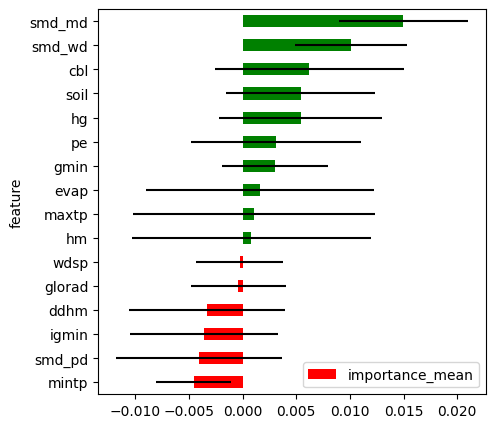

In [28]:
# plot the means and standard deviations of the importances
plot_importance(importance_dflogcarlow, figsize=(5, 5))

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_cls =  RandomForestClassifier()
lofo_imprandomforestcarlow = LOFOImportance(datasetcarlow, cv=cv4_carlow, scoring="roc_auc", model=rf_cls)

In [30]:
importance_dfforestcarlow = lofo_imprandomforestcarlow.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

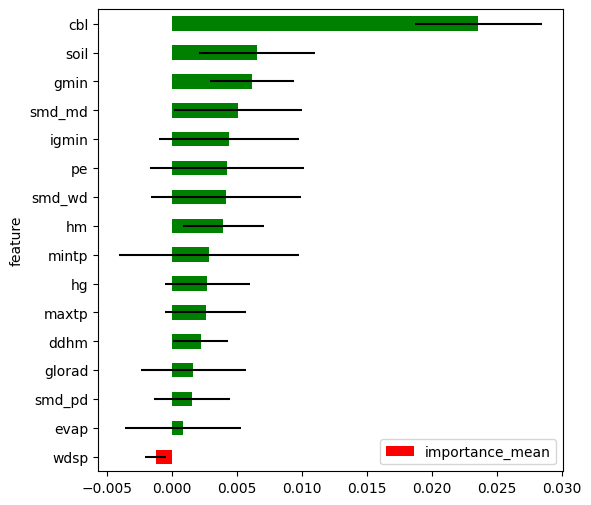

In [31]:
plot_importance(importance_dfforestcarlow, figsize=(6, 6))

In [32]:
rf_knn =  KNeighborsClassifier(n_neighbors=5)
lofo_impknncarlow = LOFOImportance(datasetcarlow, cv=cv4_carlow, scoring="roc_auc", model=rf_knn)

In [33]:
importance_knncarlow = lofo_impknncarlow.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

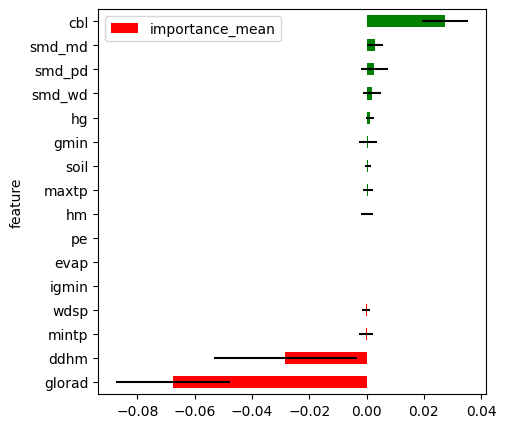

In [34]:
plot_importance(importance_knncarlow, figsize=(5, 5))

In [35]:
from sklearn.ensemble import AdaBoostClassifier
rf_adaboooster =  AdaBoostClassifier()
lofo_impadaboostercarlow = LOFOImportance(datasetcarlow, cv=cv4_carlow, scoring="roc_auc", model=rf_adaboooster)

In [36]:
importance_adacarlow = lofo_impadaboostercarlow.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

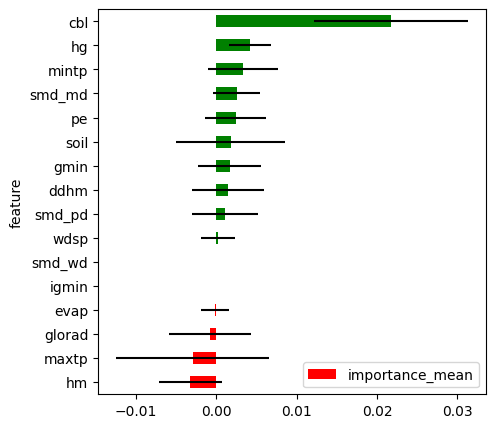

In [37]:
plot_importance(importance_adacarlow, figsize=(5, 5))

In [38]:
from xgboost import XGBClassifier
rf_xgbbooster =  XGBClassifier()
lofo_impxgbboostercarlow = LOFOImportance(datasetcarlow, cv=cv4_carlow, scoring="roc_auc", model=rf_xgbbooster)

In [39]:
importance_xgbcarlow = lofo_impxgbboostercarlow.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

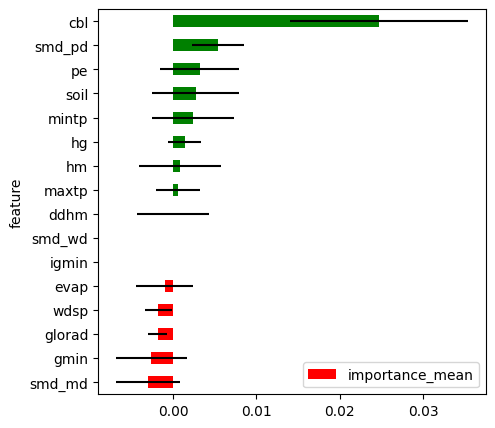

In [40]:
plot_importance(importance_xgbcarlow, figsize=(5, 5))

In [47]:
countycarlowtenyears.head()

,date,maxtp,mintp,igmin,gmin,rain,cbl,wdsp,hm,ddhm,hg,soil,pe,evap,smd_wd,smd_md,smd_pd,glorad,rainfall_class
5182,2018-01-01,8.2,2,0,-0.4,0.1,993.6,10.6,24,270,32,3.793,0.5,0.5,0.4,0.4,-9.1,338,True
5183,2018-01-02,11.6,2.1,0,-2.9,10.2,989.9,14.3,36,250,53,5.139,0.7,0.9,0.0,-9.1,-10.0,164,True
5184,2018-01-03,8.9,5,0,3.1,5.6,985.9,18.1,31,270,51,5.050,0.9,1.1,0.0,-4.7,-10.0,233,True
5185,2018-01-04,9.5,3.9,0,3.7,5.7,983.2,9.4,33,260,50,5.206,0.3,0.4,0.0,-5.4,-10.0,246,True
5186,2018-01-05,6.2,0.1,0,-1.7,0.1,987.4,4.7,10,190,14,3.419,0.2,0.3,0.1,0.1,-9.4,230,True


In [179]:
import shap
shap.initjs() 

Permutation explainer: 367it [00:26, 12.60it/s]                         


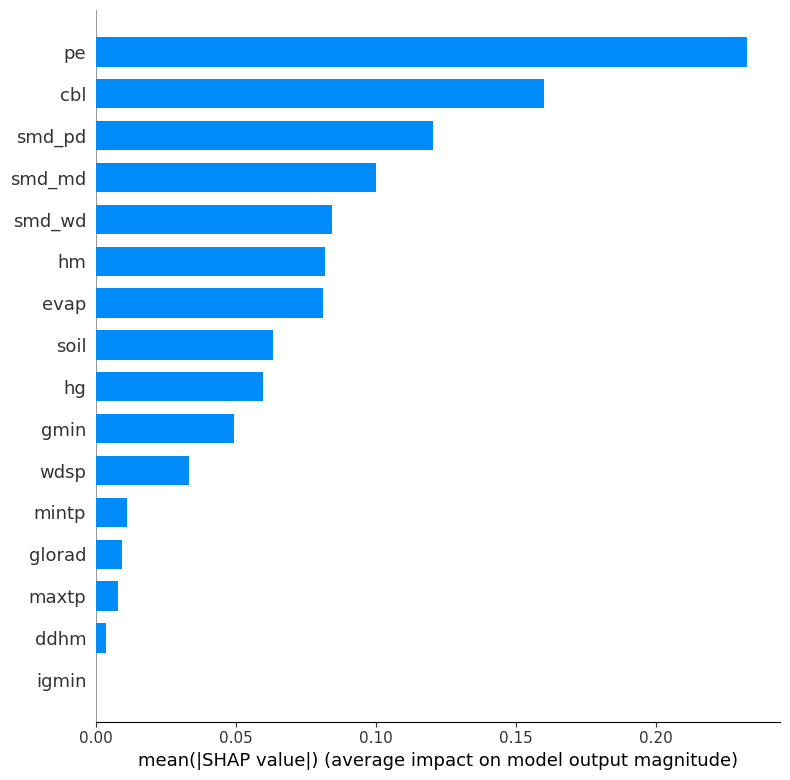

In [41]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = countycarlowtenyears.drop(['date','rain','rainfall_class'], axis=1)
y = countycarlowtenyears['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logregcarlow = LogisticRegression().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainerlogregcarlow = shap.Explainer(logregcarlow.predict, X_train)
shap_valueslogregcarlow = explainerlogregcarlow(X_test)

shap.summary_plot(shap_valueslogregcarlow, X_test, plot_type="bar")

Permutation explainer: 367it [00:42,  6.37it/s]                         


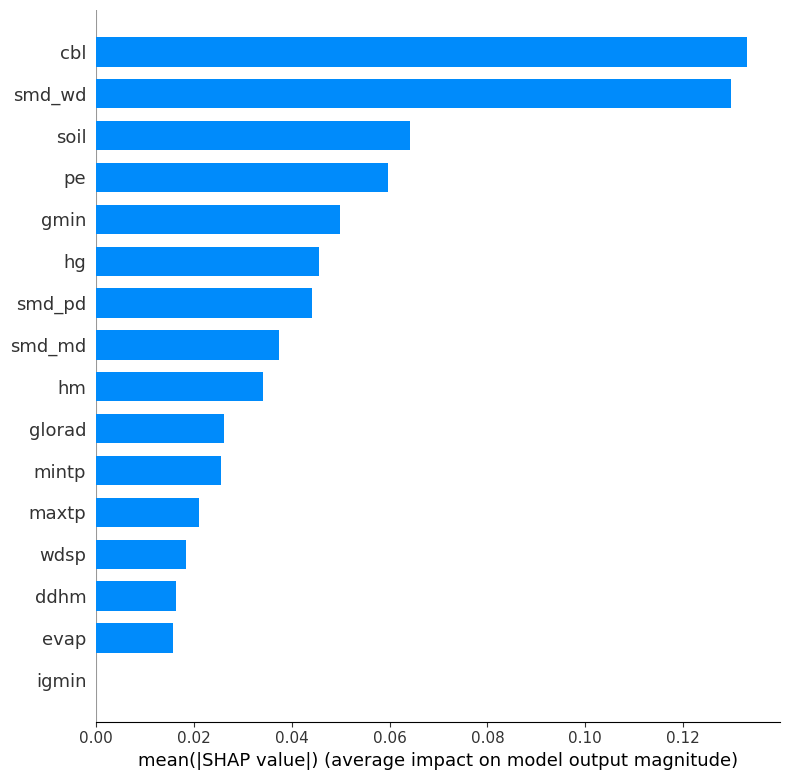

In [42]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = countycarlowtenyears.drop(['date','rain','rainfall_class'], axis=1)
y = countycarlowtenyears['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelxgb = XGBClassifier().fit(X_train, y_train)
# explain the model's predictions using SHAP
explainerxgb = shap.Explainer(modelxgb.predict,X_train)
shap_xgb = explainerxgb(X_test)
# visualize the first prediction's explanation
shap.summary_plot(shap_xgb, X_test, plot_type="bar")

Permutation explainer: 367it [04:52,  1.21it/s]                         


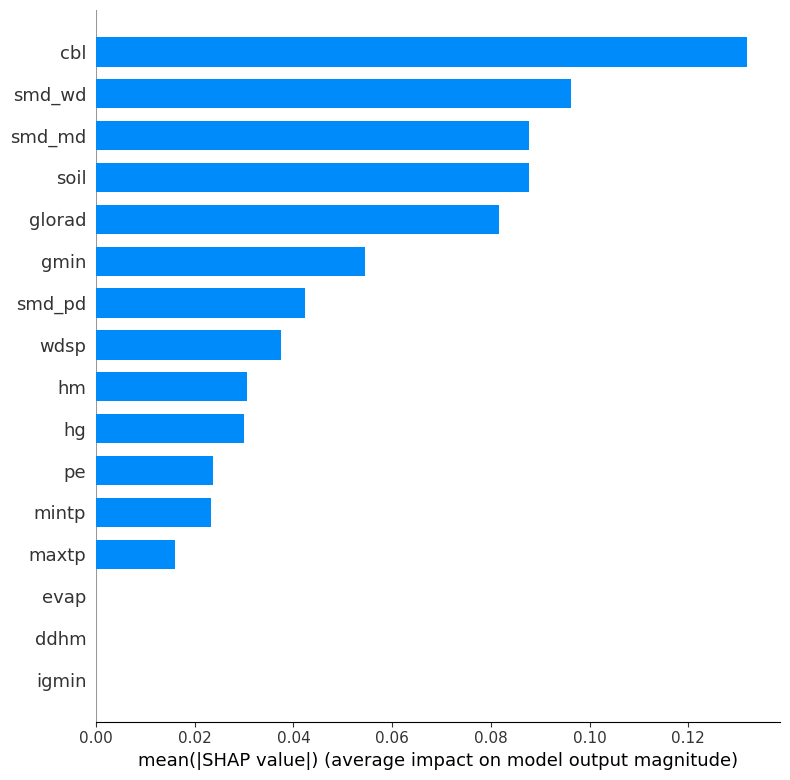

In [43]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
# Split data into features and target
X = countycarlowtenyears.drop(['date','rain','rainfall_class'], axis=1)
y = countycarlowtenyears['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


adboostcarlow = AdaBoostClassifier().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_adaboostcarlow = shap.Explainer(adboostcarlow.predict,X_train)
shap_adaboostcarlow = explainer_adaboostcarlow(X_test)

shap.summary_plot(shap_adaboostcarlow, X_test, plot_type="bar")

Permutation explainer: 367it [31:46,  5.22s/it]                         


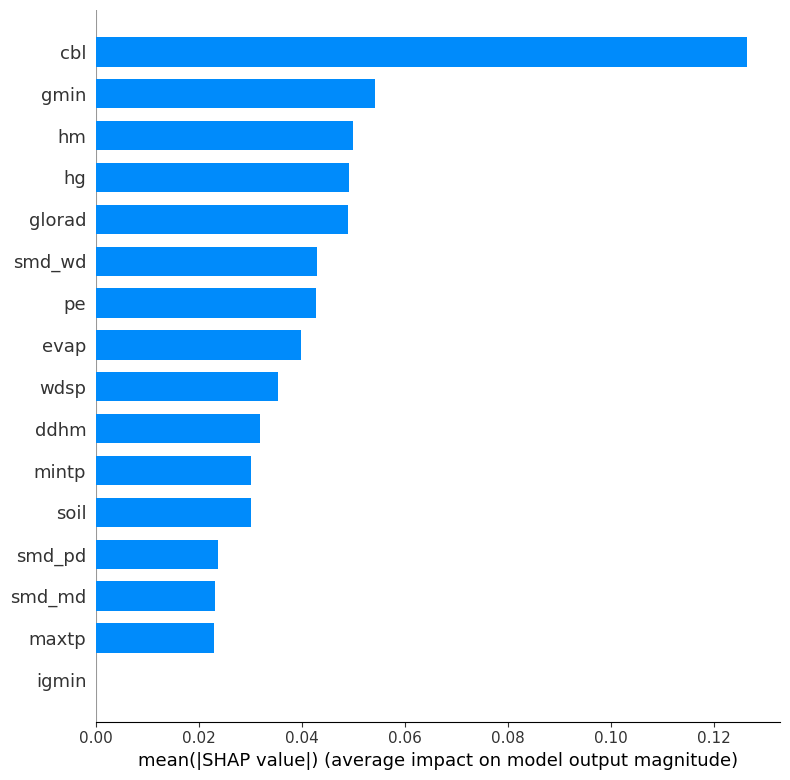

In [45]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split


# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = countycarlowtenyears.drop(['date','rain','rainfall_class'], axis=1)
y = countycarlowtenyears['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_carlow = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_knnclassifiercarlow = shap.Explainer(knn_carlow.predict, X_train)
shap_values_knnclassifier = explainer_knnclassifiercarlow(X_test)

shap.summary_plot(shap_values_knnclassifier, X_test, plot_type="bar")

